<a href="https://colab.research.google.com/github/LeonimerMelo/Machine_Learning/blob/Logistic-Regression/Logistic_Regression_from_Scratch_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Logistic Regression
If you are here, you are already introduced to the concept of logistic regression. The scikitlearn’s `LogisticRegression` is by far the best tool to use for any logistic regression task, but it is a good exercise to fiddle around and write your logistic regression algorithm and see how your algorithm fares. It always helps a great deal to write algorithms from scratch, provides you with details that you otherwise have missed, It consolidates your knowledge regarding the topic. It will be helpful if you have a prior understanding of matrix algebra and Numpy.

First thing first. We will first import the necessary libraries and datasets. In this article, we will only be using Numpy arrays.

In [ ]:
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt

## Import dataset

For this work, we will be using sklearn’s `make_classification` dataset with four features

In [ ]:
from sklearn.datasets import make_classification
# (n_classes * n_clusters_per_class) ≤ (2 ^ n_informative)
X,y = make_classification(n_samples=400, n_features=4, random_state=10, n_classes=2)
#X,y = make_classification(n_samples=400, n_features=4, random_state=10, n_classes=3, n_clusters_per_class=1, n_informative=2)

In [ ]:
import pandas as pd
df = pd.DataFrame(data=X)
df['y']=y
df

,0,1,2,3,y
0,0.654152,0.051906,0.001020,-0.270903,0
1,1.403033,-0.315077,-0.429624,0.995885,1
2,0.272872,0.258435,0.240210,-0.988668,0
3,1.343240,0.292915,0.190787,-1.245357,0
4,1.247186,0.210088,0.114478,-0.927455,0
...,...,...,...,...,...
395,0.822187,-0.318754,-0.387579,1.079581,1
396,-0.657873,-0.209640,-0.160460,0.854681,0
397,1.294968,-0.444401,-0.552072,1.487186,1
398,0.023026,-0.187583,-0.191775,0.690936,1


In [ ]:
X.shape

(400, 4)

In [ ]:
y.shape

(400,)

In [ ]:
from collections import Counter
counted = Counter(y)
print('Class total amount:', counted)

Class total amount: Counter({0: 201, 1: 199})


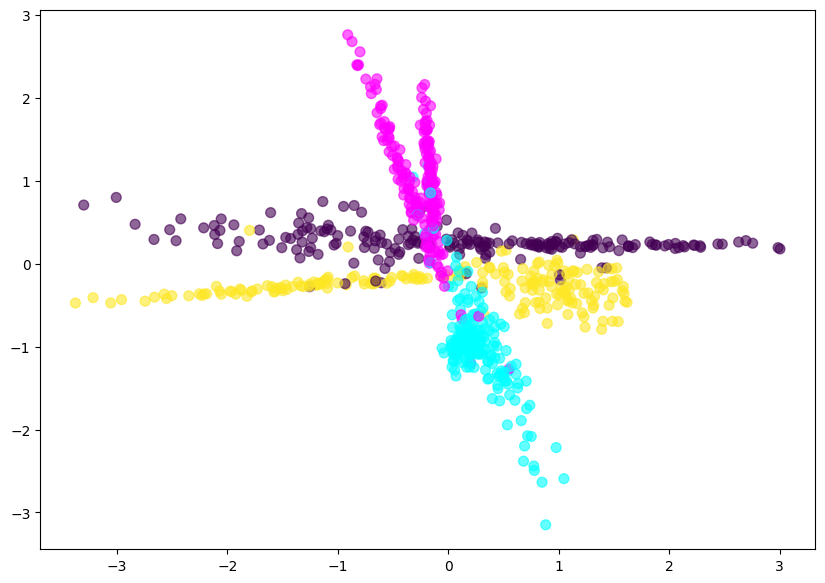

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=y, s=50, alpha=0.6)
plt.scatter(X[:,2], X[:,3], c=y, s=50, alpha=0.6, cmap='cool')
plt.show()

Train and Test data set split

In [ ]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

## Standardization

Standardization is the process of scaling data around the mean with a unit standard deviation. That means we are effectively making the mean of the attribute zero with the resulting distribution having a standard deviation equal to zero. Some algorithms are vulnerable to features with different scales. Especially if we are using gradient descent for optimization, then the model will have a hard time giving accurate results; for example, if a dataset has two features, age and salary, then the salary feature with its higher range will most likely dominate the outcome. So, it is a good practice to standardize data before feeding it to the algorithm. Highly recommended to go through this article to understand standardization clearly. This is often necessary when attributes are from different scales.

In [ ]:
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])

# F1-Score
Now that we are done with the prediction, we will move on to the F1-score section, where we will measure how good our model predicts for unseen data. The F1_score is a robust metric for evaluating the performances of classification models, and mathematically F1-score is the harmonic mean of precision and recall.

Recall, Precision, F1 Score - Simple Metric Explanation Machine Learning

precision = Precision is the number of true positives over the sum of true positives and false positives

precision = TP/(TP+FP)

recall = Recall is the number of true positives over the sum of true positives and false negatives.

recall = TP/(TP+FN)

In [ ]:
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

# class LogidticRegression

## Initializing Parameters
The data sets are always multidimensional. We will need to use matrices for any kind of calculation. So, for input, we have two matrices to deal with. The first one is for feature vectors, and the second is for parameters or weights. Our first matrix is of the mxn dimension, where m is the number of observations while n is the dimension of observations. And the second one is of nx1 dimension. Here, we will add a bias column of ones to our feature vectors matrix and a corresponding parameter term to the weight vector. Bias is important to make the model more flexible.
```
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
```

## Sigmoid Function (or Logistic Function)
In a linear regression model, the hypothesis function is a linear combination of parameters given as y = ax+b for a simple single parameter data. This allows us to predict continuous values effectively, but in logistic regression, the response variables are binomial, either ‘yes’ or ‘no’. So, it makes less sense to use the linear function to predict anything except the values between 0 and 1. And the most effective function to limit the results of a linear equation to [0,1] is the sigmoid or logistic function.

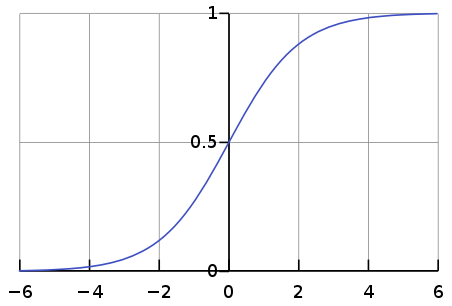

As you can see, the sigmoid function intersects the y-axis at 0.5. In most cases, we use this point as a threshold for classification. Any value above it will be classified as 1, while any value below is 0. This is not a rule of thumb. We can also use different values instead of 0.5, depending on the requirements. The sigmoid function:

$$ y=1/(1+exp(-x))$$


```
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
```



Sigmoid function plotting

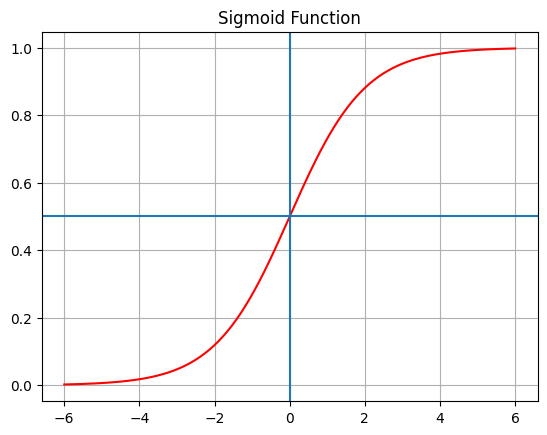

In [ ]:
x_ = np.linspace(-6,6,200)
sigmoid_x = 1/(1+exp(-x_))
plt.plot(x_, sigmoid_x, 'r')
plt.grid()
plt.axvline(0)
plt.axhline(0.5)
plt.title('Sigmoid Function')
plt.show()

## Hypothesis Function
More formally, we define the logistic regression model for binary classification problems. We choose the hypothesis function to be the Sigmoid Function:
$$h_{\theta }(x)=\frac{1}{1+e^{-\theta ^{T}x}} \tag{1}$$
Here, $\theta$ denotes the parameter vector. For a model containing $n$ features, we have $\theta = [\theta_0, \theta_1, ..., \theta_n]$ containing $n + 1$ parameters.

## Cross Entropy Cost (Loss) Function
Cost function or loss function is that function that describes how much the calculated value deviates from the actual value. Linear regression employs the **least squared error** as the cost function. But the least squared error function **for logistic regression is non-convex**. While performing gradient descent chances that we get stuck in a local minimum is more. So instead, we use **Cross Entropy log loss as the cost function**.

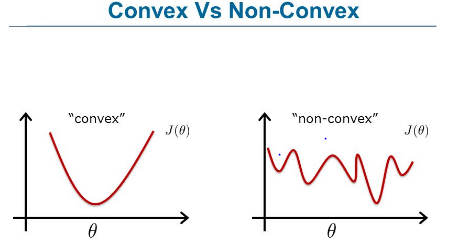

In this case, finding an optimal solution with the gradient descent method with mean squared error cost function is not possible. Instead, we use a logarithmic function to represent the cost of logistic regression. It is guaranteed to be convex for all input values, containing only one minimum, allowing us to run the gradient descent algorithm.

When dealing with a binary classification problem, the logarithmic cost of error depends on the value of y. We can define the cost for two cases separately:
$$cost(h_{\theta}(x),y) =\left\{\begin{matrix}
- log(h_{\theta}(x)) & \text{, if } y = 1\\
 - log(1-h_{\theta}(x)) & \text{, if } y = 0
\end{matrix}\right. \tag{2}$$

Which then results in:

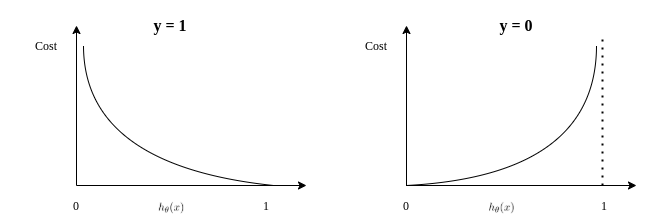

Because when the actual outcome $y = 1$, the cost is $0$ for $h_{\theta}(x) = 1$ and takes the maximum value for $h_{\theta}(x) = 0$. Similarly, if $y = 0$, the cost is 0 for $h_{\theta}(x) = 0$.

The formula gives the cost function for the logistic regression:
$$
J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{i}\ln(h_{\theta}(x^{i}))+(1-y^{i})\ln(1-h_{\theta}(x^{i}))] \tag{3}
$$

Where $h_{\theta}$ is the sigmoid function.

```
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
```





## Gradient Descent
The next step is gradient descent. Gradient descent is an optimization algorithm that is responsible for the learning of best-fitting parameters. So what are the gradients? The **gradients are the vector of the 1st order derivative of the cost function**. These are the direction of the steepest ascent or maximum of a function. For gradient descent, we move in the opposite direction of the gradients. We will be updating the weights in every iteration until the convergence.

By differentiating the cost function, we get the gradient descent expression:

$$\frac{\partial J(\theta )}{\partial \theta_{j}}=\frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)} \tag{4}$$

Let's proof it!

Summing up, the cross-entropy is positive, and tends toward zero as
the neuron gets better at computing the desired output, $y$, for all
training inputs, $x$.  These are both properties we'd intuitively
expect for a cost function.  Indeed, both properties are also
satisfied by the quadratic cost. So that's good news for the
cross-entropy.  But the cross-entropy cost function has the benefit
that, unlike the quadratic cost, it avoids the problem of learning
slowing down.  To see this, let's compute the partial derivative of
the cross-entropy cost with respect to the weights.  We substitute $h_{\theta}
= \sigma(z)$ into (3) and apply the chain rule twice, obtaining:

\begin{eqnarray}
  \frac{\partial C}{\partial w_j} & = & -\frac{1}{m} \sum_x \left(
    \frac{y }{\sigma(z)} -\frac{(1-y)}{1-\sigma(z)} \right)
  \frac{\partial \sigma}{\partial w_j} \tag{5}\\
 & = & -\frac{1}{m} \sum_x \left(
    \frac{y}{\sigma(z)}
    -\frac{(1-y)}{1-\sigma(z)} \right)\sigma'(z) x_j.
\tag{6}
\end{eqnarray}

Putting everything over a common denominator and simplifying this
becomes:

\begin{eqnarray}
  \frac{\partial C}{\partial w_j} & = & \frac{1}{m}
  \sum_x \frac{\sigma'(z) x_j}{\sigma(z) (1-\sigma(z))}
  (\sigma(z)-y).
\tag{7}\end{eqnarray}

Using the definition of the sigmoid function, $\sigma(z) =
1/(1+e^{-z})$, and a little algebra we can show that $\sigma'(z) =
\sigma(z)(1-\sigma(z))$.  I'll ask you to verify this in an exercise
below, but for now let's accept it as given.  We see that the
$\sigma'(z)$ and $\sigma(z)(1-\sigma(z))$ terms cancel in the equation
just above, and it simplifies to become:

\begin{eqnarray}
  \frac{\partial C}{\partial w_j} =  \frac{1}{m} \sum_x x_j(\sigma(z)-y).
\tag{8}\end{eqnarray}

This is a beautiful expression.  It tells us that the rate at which
the weight learns is controlled by $\sigma(z)-y$, i.e., by the error
in the output.  The larger the error, the faster the neuron will
learn.  This is just what we'd intuitively expect.  In particular, it
avoids the learning slowdown caused by the $\sigma'(z)$ term in the
analogous equation for the quadratic cost. When we use the cross-entropy, the $\sigma'(z)$ term gets canceled
out, and we no longer need worry about it being small.  This
cancellation is the special miracle ensured by the cross-entropy cost
function.  Actually, it's not really a miracle.  As we'll see later,
the cross-entropy was specially chosen to have just this property.

The vectorised form of the gradient descent expression, which we will be using in our code is:
$$X^T (h_{\theta}(x) - y) \tag{9}$$

## Minimizing the Cost with Gradient Descent
Gradient descent is an iterative optimization algorithm, which finds the minimum of a differentiable function. In this process, we try different values and update them to reach the optimal ones, minimizing the output.

In this article, we can apply this method to the cost function of logistic regression. This way, we can find an optimal solution minimizing the cost function $J(\theta)$ over model parameters.

As already explained, we’re using the sigmoid function as the hypothesis function in logistic regression.

Here, the alpha is the step size responsible for how quick it converges to the global minimum. If the step size is too small, it will converge slowly, but if it is too large, it may overshoot the minimum while descending.

Assume we have a total of $n$ features. In this case, we have $n$ parameters for the $\theta$ vector. To minimize our cost function, we need to run the gradient descent on each parameter $\theta_j$:

$$\theta_j \gets \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta), \tag{10}$$
where $\alpha$ is the learning rate.

Furthermore, we need to update each parameter simultaneously for each iteration. In other words, we need to loop through the parameters $\theta_0, \theta_1, …, \theta_n$ in vector $\theta = [\theta_0, \theta_1, ..., \theta_n]$.

Plugging this into the gradient descent function leads to the update rule:

$$\theta_j \gets \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_{\theta}(x^{(i)}) - y^{(i)} \right) x_j^{(i)} \tag{11}$$

Surprisingly, the update rule is the same as the one derived by using the sum of the squared errors in linear regression. As a result, we can use the same gradient descent formula for logistic regression as well.

By iterating over the training samples until convergence, we reach the optimal parameters $\theta$ leading to minimum cost.

```
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
```



In [ ]:
class LogidticRegression:

    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig

    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X

    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)

        def cost(theta):
          z = dot(X,theta)
          cost0 = y.T.dot(log(self.sigmoid(z)))
          cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
          cost = -((cost1 + cost0))/len(y)
          return cost

        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)[0]
        self.weights = weights
        return cost_list

    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [ ]:
# Standardization
standardize(X_tr)
standardize(X_te)

In [ ]:
# Model fit and Predictions
obj1 = LogidticRegression()
model= obj1.fit(X_tr,y_tr,alpha=.01,iter=50)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)

In [ ]:
#Let's see the f1-score for training and testing data
f1_score_tr = F1_score(y_tr,y_train)
f1_score_te = F1_score(y_te,y_pred)
print('Training F1 score: ', f1_score_tr)
print('Testing F1 score: ', f1_score_te)

Training F1 score:  0.9476584022038568
Testing F1 score:  1.0


In [ ]:
accuracy = (y_te == y_pred).mean()
print("Accuracy: {:.1f}%".format(accuracy * 100))

Accuracy: 100.0%


Plotting Cost Function

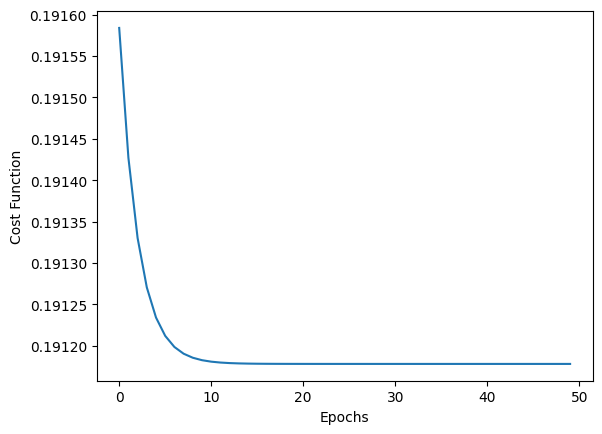

In [ ]:
plt.plot(model)
plt.xlabel('Epochs')
plt.ylabel('Cost Function')
plt.show()

In [ ]:
# sklearn Logistic Regression F1 score metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model = LogisticRegression().fit(X_tr,y_tr)
y_pred = model.predict(X_te)
print('sklearn F1 score metrics: ',f1_score(y_te,y_pred))

sklearn F1 score metrics:  1.0


In [ ]:

# Model score
model.score(X_te, y_te)

1.0

# Referências

[1] https://www.analyticsvidhya.com/blog/2022/02/implementing-logistic-regression-from-scratch-using-python/

[2] https://www.baeldung.com/cs/gradient-descent-logistic-regression

[3] http://neuralnetworksanddeeplearning.com/chap3.html

[4] https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html